In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=[0], 
                     index_col=0, squeeze=True, date_parser=parser)

In [7]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

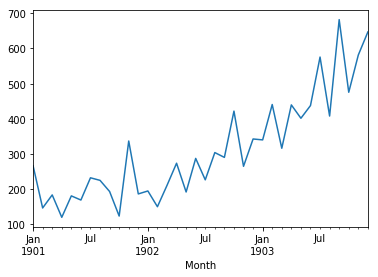

In [9]:
series.plot()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


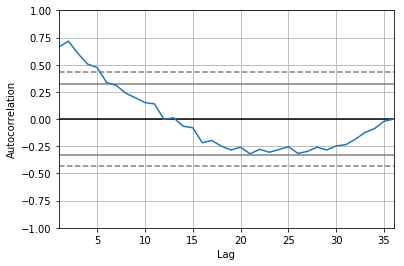

In [10]:
pd.tools.plotting.autocorrelation_plot(series)

# ARIMA(p,d,q)
**ARIMA(5,1,0) sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.**

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [18]:
model_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                         Results: ARIMA
=================================================================================================
Model:                ARIMA                                       BIC:                 417.2273  
Dependent Variable:   D.Sales of shampoo over a three year period Log-Likelihood:      -196.17   
Date:                 2019-01-02 22:22                            Scale:               1.0000    
No. Observations:     35                                          Method:              css-mle   
Df Model:             6                                           Sample:              02-01-1901
Df Residuals:         29                                                               12-01-1903
Converged:            1.0000                                      S.D. of innovations: 64.241    
AIC:                  406.3399                                    HQIC:                410.098   
-------------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------------------
const                                             12.0649   3.6516  3.3040 0.0025  4.9078 19.2219
ar.L1.D.Sales of shampoo over a three year period -1.1082   0.1828 -6.0634 0.0000 -1.4664 -0.7500
ar.L2.D.Sales of shampoo over a three year period -0.6203   0.2816 -2.2030 0.0357 -1.1722 -0.0684
ar.L3.D.Sales of shampoo over a three year period -0.3606   0.2950 -1.2224 0.2314 -0.9388  0.2176
ar.L4.D.Sales of shampoo over a three year period -0.1252   0.2801 -0.4470 0.6582 -0.6741  0.4237
ar.L5.D.Sales of shampoo over a three year period  0.1289   0.1915  0.6734 0.5060 -0.2463  0.5042
--------------------------------------------------------------------------------------------------------------------
                          Real                     Imaginary                    Modulus                    Frequency
--------------------------------------------------------------------------------------------------------------------
AR.1                    -1.0617                      -0.5064                     1.1763                      -0.4292
AR.2                    -1.0617                       0.5064                     1.1763                       0.4292
AR.3                     0.0816                      -1.3804                     1.3828                      -0.2406
AR.4                     0.0816                       1.3804                     1.3828                       0.2406
AR.5                     2.9315                      -0.0000                     2.9315                      -0.0000
=================================================================================================

"""

## Get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

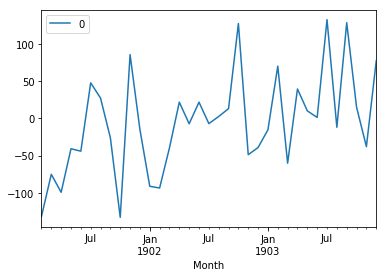

In [21]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

## Get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

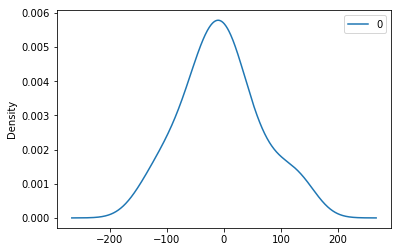

In [22]:
residuals.plot(kind='kde')

## The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [23]:
residuals.describe()

,0
count,35.000000
mean,-5.495142
std,68.132886
min,-133.296544
25%,-42.477821
50%,-7.186457
75%,24.748411
max,133.238018


# Rolling Forecast

In [29]:
from sklearn.metrics import mean_squared_error

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

predicted=349.117713, expected=342.300000
predicted=306.512956, expected=339.700000
predicted=387.376432, expected=440.400000
predicted=348.154152, expected=315.900000
predicted=386.308825, expected=439.300000
predicted=356.082126, expected=401.300000
predicted=446.379546, expected=437.400000
predicted=394.737294, expected=575.500000
predicted=434.915464, expected=407.600000
predicted=507.923473, expected=682.000000
predicted=435.482961, expected=475.300000
predicted=652.743641, expected=581.300000
predicted=546.343429, expected=646.900000
Test MSE: 6958.322


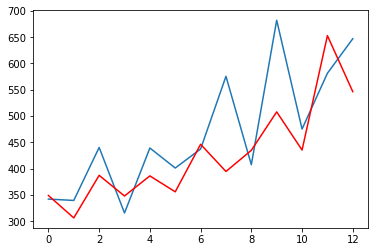

In [31]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
# pyplot.show()

In [33]:
import math
math.sqrt(6958.322)

83.41655710948517